# TP : Basketball

<center><img src= 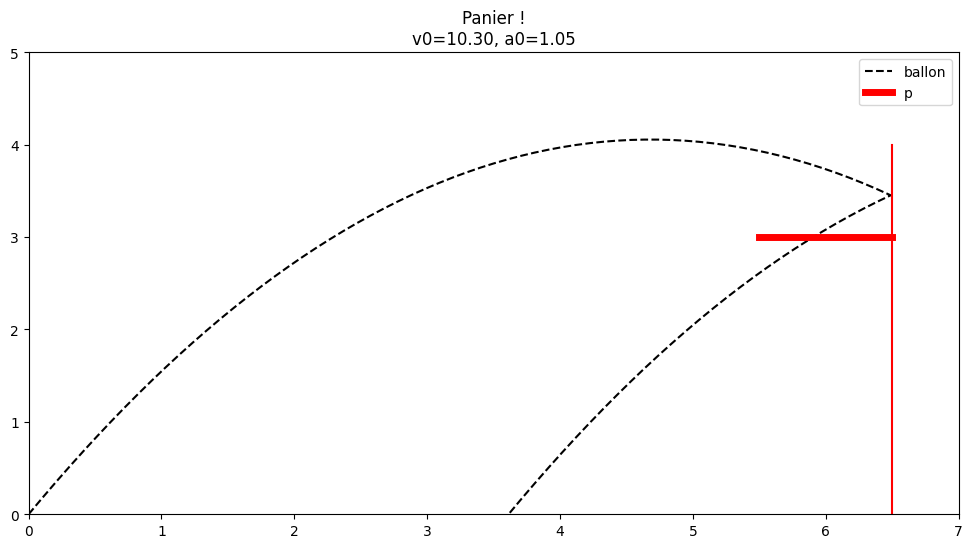 width=700></center>


On souhaite lancer un ballon de basket depuis l'origine (le point de coordonnée $(0, 0)$) vers un panier de coordonnées $p$ généré aléatoirement :

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
np.random.seed(0) # changer le 0 pour changer la position du panier

def panier():
    return np.random.randint(6, 10), np.random.randint(2, 5)
p = panier()
p # p[0] est l'abscisse du panier, p[1] est son ordonnée

(6, 3)

## Trajectoire

Étant donnée une vitesse initiale , on veut déterminer la trajectoire du ballon.
<center><img src=https://raw.githubusercontent.com/fortierq/tikz-pdf/main/geometry/ballon/ballon.png width=300></center>  

On utilise les notations suivantes :
- $m$ est le poids du ballon en kg.
- $v_0$ est la vitesse initiale (en $m.s^{-1}$) et $\alpha_0$ l'angle initial (en radian) par rapport à l'axe des abscisses.  
- $x(t)$, $y(t)$ est la position (en $m$) du ballon à l'instant $t$.
- $v_x(t)$, $v_y(t)$ est la vitesse (en $m.s^{-1}$) du ballon à l'instant $t$, projeté sur l'axe des abscisses et des ordonnées.

On considère seulement la force de pesanteur sur le ballon.

````{admonition} Question
 Appliquer le principe fondamental de la dynamique sur le ballon pour exprimer $x(t)$ et $y(t)$ en fonction de $v_0$, $\alpha_0$, $t$ et $g$ (champ de pesanteur terrestre).
````

Dans la suite, on utilisera un pas $\Delta t = 0.01$ et $g = 9.81$.

````{admonition} Question
 Écrire une fonction `trajectoire(v0, a0)` renvoyant deux listes `x` et `y` telles que `x[k]` et `y[k]` sont les coordonnées du ballon à l'instant $k \times \Delta t$. On arrêtera la trajectoire lorsque le ballon touche le sol.
````

In [129]:
x, y = trajectoire(10, np.pi/4)
x[:5], y[:5] # les 5 premières valeurs de x et y

([0,
  0.07071067811865478,
  0.14142135623730956,
  0.2121320343559643,
  0.2828427124746191],
 [0,
  0.07022017811865475,
  0.1394593562373095,
  0.20771753435596427,
  0.274994712474619])

````{admonition} Question
 Tester avec le code ci-dessous.
````

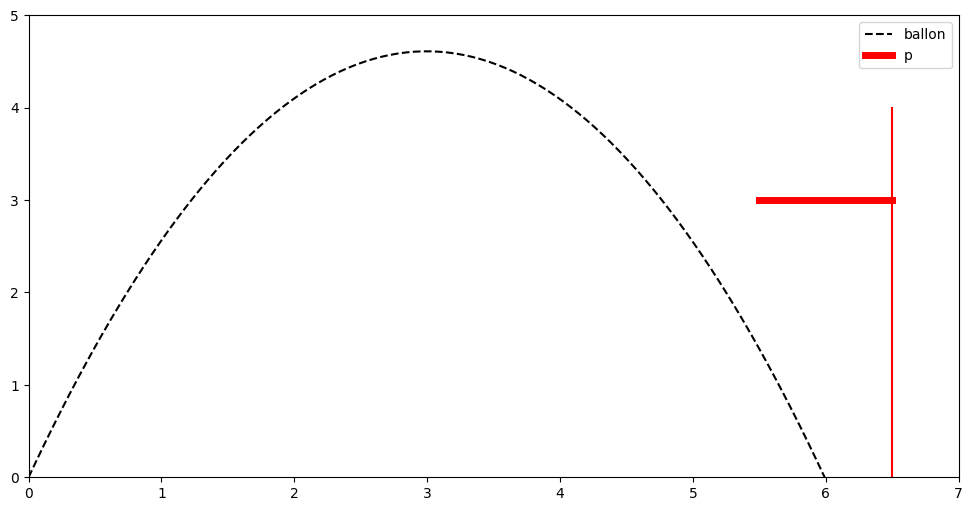

In [169]:
def afficher_trajectoire(x, y):
    plt.plot(x, y, "k--", label="ballon")
    plt.plot([p[0] - .5, p[0] + .5], [p[1], p[1]], c="r", lw=5, label="p")
    plt.plot([p[0] + .5]*2, [0, p[1] + 1], c="r")
    plt.legend()
    plt.xlim(0, p[0] + 1)
    plt.ylim(0, p[1] + 2)

v0, a0 = 10, np.pi/2.5 # changer les valeurs de v0 et a0 pour changer la trajectoire
x, y = trajectoire(v0, a0)
afficher_trajectoire(x, y)
plt.show()

````{admonition} Question
 Écrire une fonction `resultat` telle que, si `x` et `y` sont des listes correspondant à une trajectoire (comme renvoyé par `trajectoire`) et `p` les coordonnées du panier, `resultat(x, y, p)` renvoie `0` si le ballon rentre dans le panier, `1` si le ballon a été lancé trop fort et `-1` s'il n'a pas été lancé assez fort.  
Pour cela, on cherchera dans `y` un indice `i` tel que `y[i]` > `p[1]` et `y[i+1]` < `p[1]`. On considère que le ballon est rentré dans le panier si `abs(x[i] - p[0]) < 0.5`, que le ballon a été lancé trop fort si `x[i] > p[0]` et pas assez fort sinon.
````

In [148]:
resultat(x, y, p) # le ballon n'a pas été lancé assez fort

-1

````{admonition} Question
 Tester avec la fonction ci-dessous. Modifier `v0` pour marquer un panier. 
````

In [170]:
def afficher(v0, a0, p):
    x, y = trajectoire(v0, a0)
    afficher_trajectoire(x, y)
    r = resultat(x, y, p)
    if r == 0:
        r = "Panier !"
    elif r > 0:
        r = "Trop fort !"
    else:
        r = "Pas assez fort !"
    plt.title(f"{r}\nv0={v0:.2f}, a0={a0:.2f}")
    plt.show()

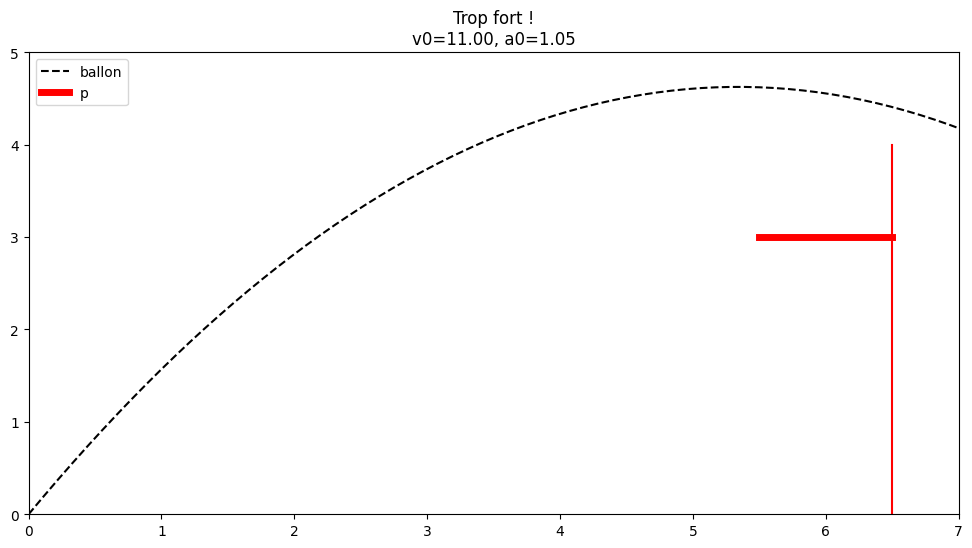

In [171]:
afficher(11, np.pi / 3, p)

## Détermination de la vitesse initiale

### Recherche exhaustive

Étant donné un angle $\alpha_0$ fixé, on veut déterminer une vitesse initiale $v_0$ permettant de marquer un panier.  
Une première approche consiste à tester beaucoup de valeurs en espérant tomber sur un $v_0$ qui convient.

````{admonition} Question
 Écrire une fonction `brute(a0, p)` qui teste toutes les valeurs de $v_0$ comprises entre 0 et 15 par pas de 0.01 et renvoie le premier $v_0$ qui permet de marquer un panier.
````

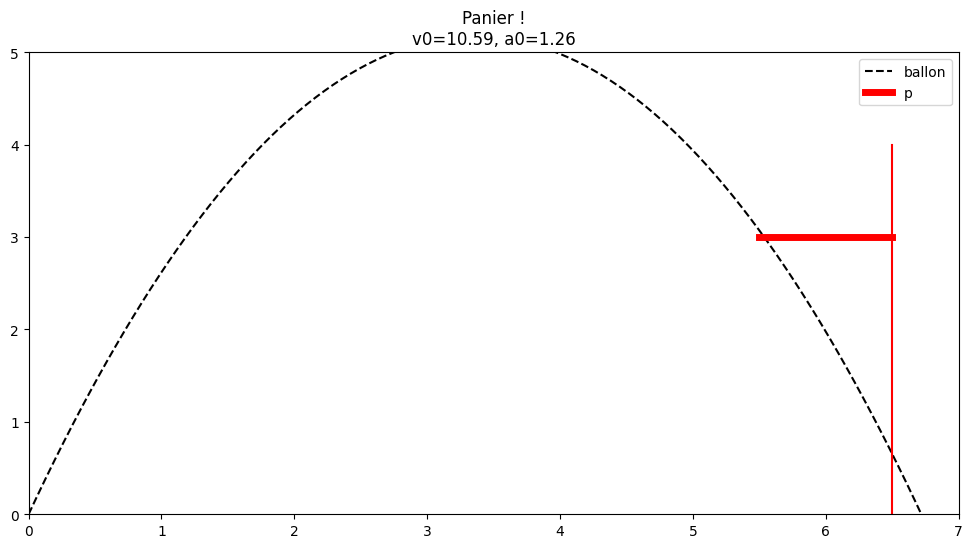

In [154]:
afficher(brute(a0, p), a0, p)

### Par dichotomie

La recherche par dichotomie est plus efficace : on essaie une vitesse et on l'augmente ou la diminue en fonction du résultat.

Plus précisément, on conserve en mémoire deux variables $a$ et $b$ (initialement on prendra $a = 0$ et $b = 15$)) puis :
1. On calcule $v_0 = \frac{a + b}{2}$.
2. Si $v_0$ permet de marquer, on le renvoie.
3. Si $v_0$ était trop fort, on remplace $a$ par $v_0$ et on revient en 1.
4. Si $v_0$ n'était pas assez fort, on remplace $b$ par $v_0$ et on revient en 1.

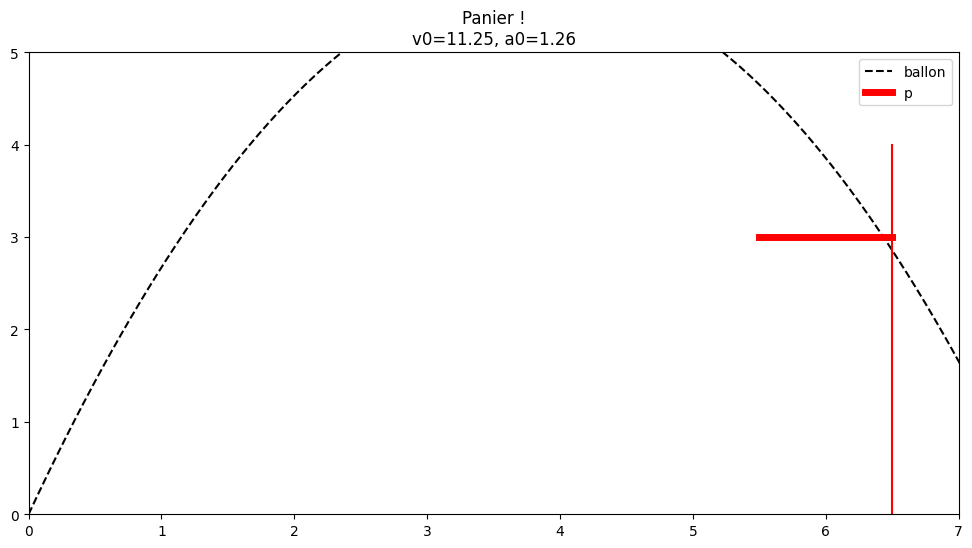

In [173]:
afficher(dichotomie(a0, p), a0, p)

### Avec une équation

Reprendre les équations de $x(t)$ et $y(t)$ que vous avez trouvé en première question du TP.

````{admonition} Question
 Si $p_0$ et $p_1$ sont les coordonnées du panier, résoudre les équations suivantes d'inconnue $v_0$ :  

$$
    x(t) = p_0\\
    y(t) = p_1
$$
````

````{admonition} Question
 En déduire une fonction `equation(a0, p)` qui renvoie la vitesse initiale $v_0$ permettant de marquer un panier.
````

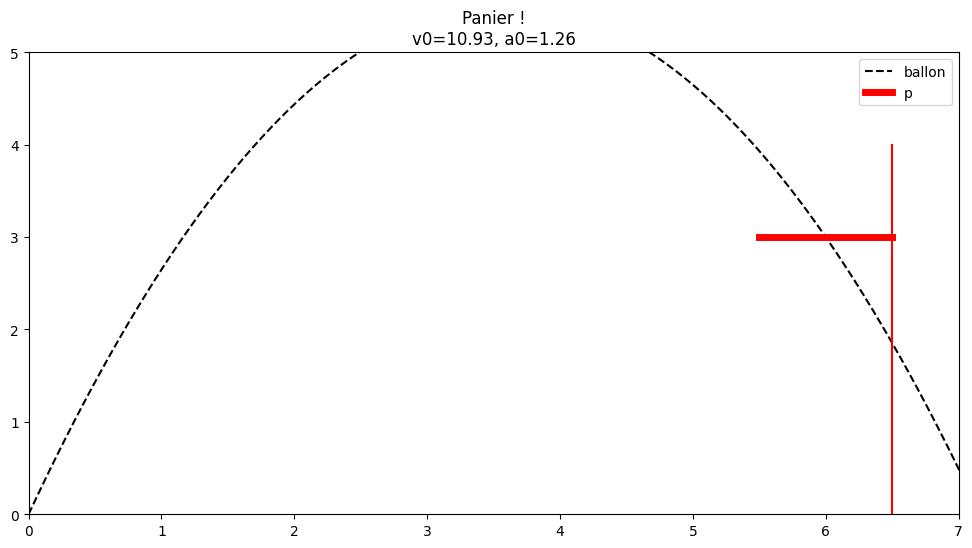

In [175]:
afficher(equation(a0, p), a0, p)

## Panier avec rebond

On veut maintenant gérer les rebonds sur le panneau. Pour cela on introduit une variable $s$ qui indique la direction dans laquelle le ballon se déplace : vers la droite si $s = 1$ et vers la gauche si $s = -1$. Initialement, $s = 1$ et $s$ devient égal à $-1$ en cas de rebond.  
On calcule alors $x(t + \Delta t)$ avec l'équation de récurrence suivante :

$$
    x(t + \Delta t) = x(t) + s \Delta t \times v_x(t)
$$

Le calcul de $y(t)$ ne change pas (même code que `trajectoire`).

On pourra tester si le ballon en position $(x, y)$ touche le panneau du panier $p$ avec la fonction suivante :

In [197]:
def rebond(x, y, p):
    return p[0] + .45 < x < p[0] + .6 and y < p[1] + 1

````{admonition} Exercice
 Écrire une fonction `trajectoire2(v0, a0, p)` renvoyant des listes `x` et `y` correspondant à la trajectoire du ballon, avec éventuellement un rebond sur le panneau du panier. On arrêtera la trajectoire lorsque le ballon touche le sol.

Tester ensuite avec la fonction ci-dessous.
````

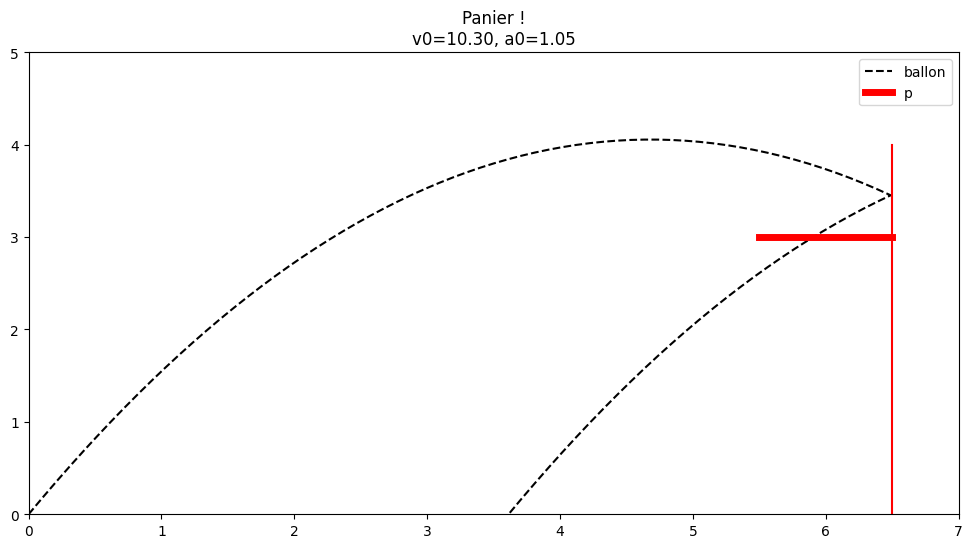

In [203]:
def afficher2(v0, a0, p):
    x, y = trajectoire2(v0, a0, p)
    afficher_trajectoire(x, y)
    r = resultat(x, y, p)
    if r == 0:
        r = "Panier !"
    elif r > 0:
        r = "Trop fort !"
    else:
        r = "Pas assez fort !"
    plt.title(f"{r}\nv0={v0:.2f}, a0={a0:.2f}")
    plt.show()

afficher2(10.3, np.pi/3, p) # pour tester